In [2]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the data
data = pd.read_csv('Fish.csv')

In [3]:
#check the first five values
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#statastical analysis
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
#check the data types
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [6]:
#check unique values in Species column
data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

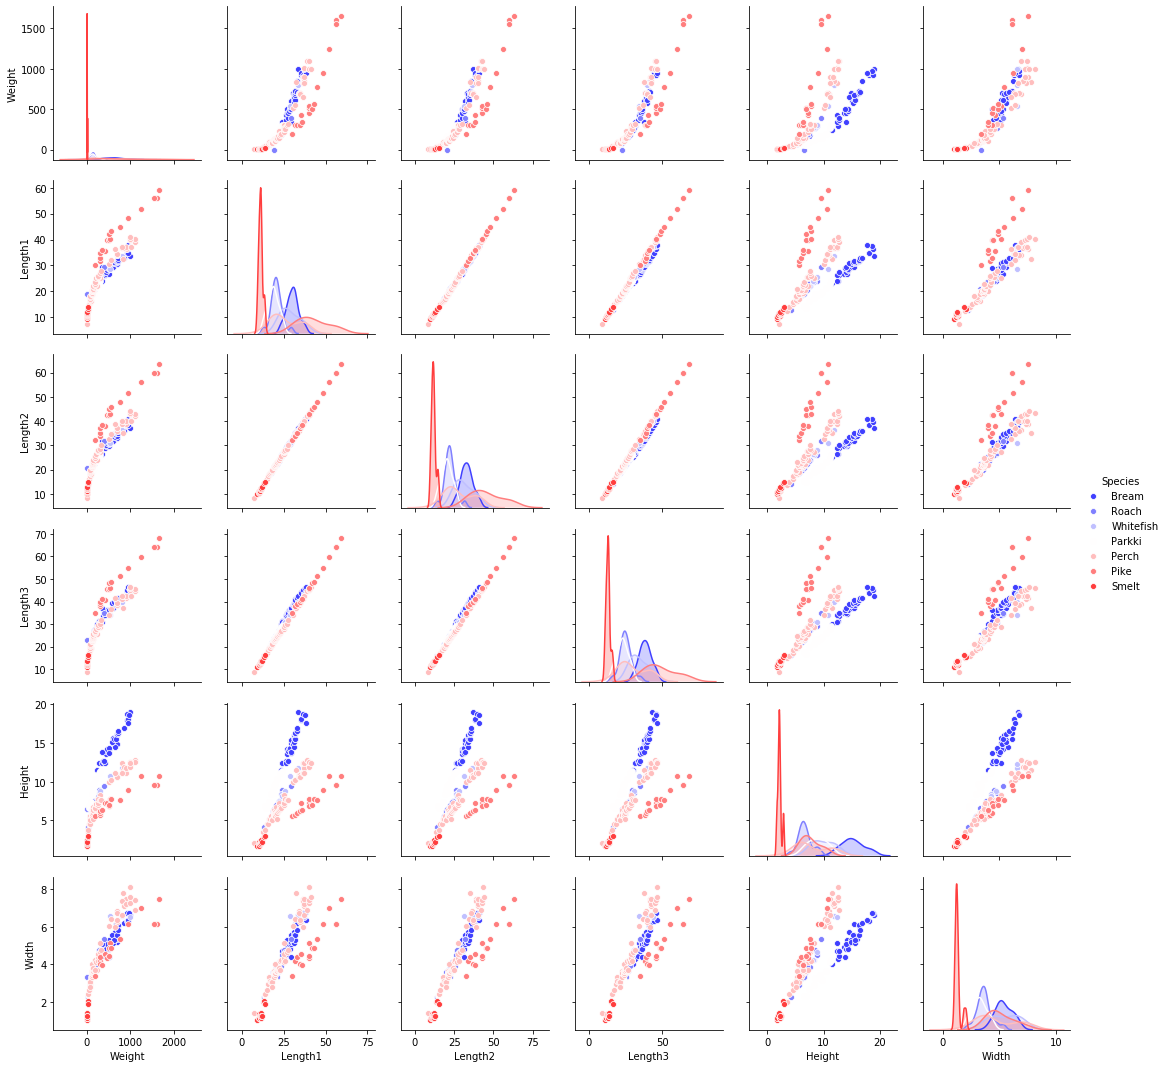

In [5]:
sns.pairplot(data,hue='Species',palette='bwr')

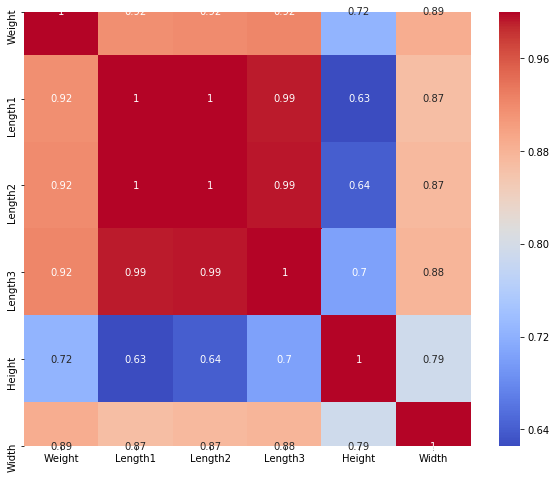

In [8]:
#coeffiient corelation of varibales
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [9]:
#separting independent and dependent variable to x and y
x = data.iloc[:,1:]
y = data.iloc[:,0]
x.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [10]:
#splitting x and y data to test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
#fitting the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() 
classifier.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#predicting on x_test
y_pred = classifier.predict(x_test) 

In [13]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[6 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 9 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 1 0 3 1 0]
 [0 0 0 0 0 1 0]
 [0 0 3 0 0 0 0]]


In [14]:
#finding the accuracy score
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.84375


In [15]:
#Create a classification report for the model
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         6
      Parkki       1.00      1.00      1.00         3
       Perch       0.69      1.00      0.82         9
        Pike       1.00      1.00      1.00         5
       Roach       1.00      0.60      0.75         5
       Smelt       0.50      1.00      0.67         1
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.84        32
   macro avg       0.74      0.80      0.75        32
weighted avg       0.80      0.84      0.81        32



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
